# 第一问：

第一小问

In [22]:
import matplotlib
from matplotlib.font_manager import FontProperties
# 设置 matplotlib 支持中文显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False    # 解决保存图像时负号'-'显示为方块的问题
#原创作者：数学建模专业团队 原创地址：https://www.yuque.com/u42168770/qv6z0d/tpdozi4vi1b0u20z 
#B站关注：北辰single，获取更多比赛资料


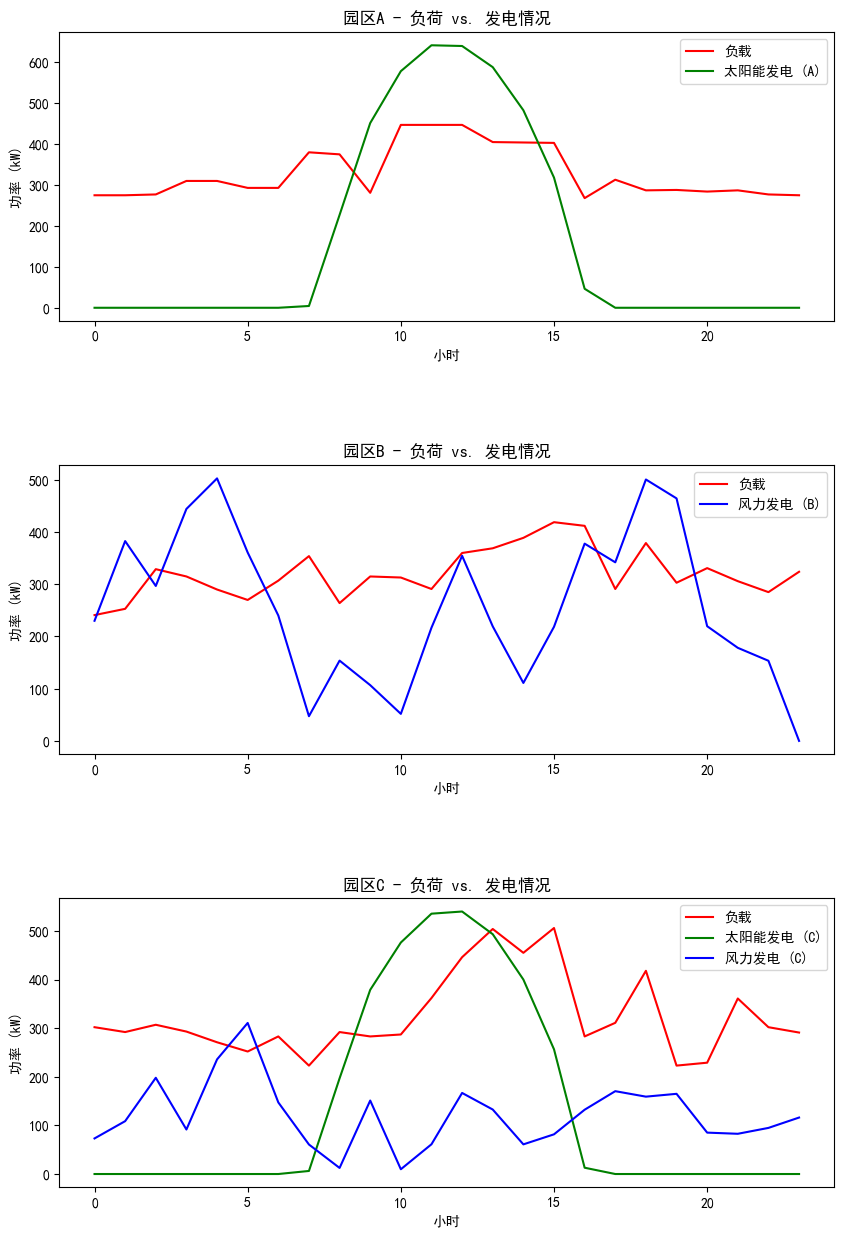

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 载入数据
load_data_path = "附件1：各园区典型日负荷数据.xlsx"
generation_data_path = "附件2：各园区典型日风光发电数据.xlsx"

load_data = pd.read_excel(load_data_path)
generation_data = pd.read_excel(generation_data_path)

# 设置正确的表头
generation_data.columns = ['时间', '太阳能_A', '风力_B', '太阳能_C', '风力_C']

# 数据转换为数值类型
load_data.iloc[:, 1:] = load_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
generation_data.iloc[:, 1:] = generation_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# 根据装机容量计算实际发电量
generation_data['太阳能_A'] *= 750  # A园区太阳能装机容量
generation_data['风力_B'] *= 1000  # B园区风力装机容量
generation_data['太阳能_C'] *= 600  # C园区太阳能装机容量
generation_data['风力_C'] *= 500   # C园区风力装机容量

# 为每个园区绘制数据图
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
fig.subplots_adjust(hspace=0.5)

# 为每个园区绘制图表
parks = ['A', 'B', 'C']
for idx, park in enumerate(parks):
    axes[idx].plot(generation_data.index, load_data[f'园区{park}负荷(kW)'], label='负载', color='red')
    
    if park == 'C':
        # C园区同时具有太阳能和风力发电
        axes[idx].plot(generation_data.index, generation_data['太阳能_C'], label='太阳能发电 (C)', color='green')
        axes[idx].plot(generation_data.index, generation_data['风力_C'], label='风力发电 (C)', color='blue')
    elif park == 'A':
        axes[idx].plot(generation_data.index, generation_data['太阳能_A'], label='太阳能发电 (A)', color='green')
    elif park == 'B':
        axes[idx].plot(generation_data.index, generation_data['风力_B'], label='Wind Generation (B)', color='blue')

    axes[idx].set_title(f'园区{park} - 负荷 vs. 发电情况')
    axes[idx].set_xlabel('小时')
    axes[idx].set_ylabel('功率 (kW)')
    axes[idx].legend()

plt.show()

In [20]:
import pandas as pd

# 加载数据
load_data_path = "附件1：各园区典型日负荷数据.xlsx"
generation_data_path = "附件2：各园区典型日风光发电数据.xlsx"

load_data = pd.read_excel(load_data_path)
generation_data = pd.read_excel(generation_data_path)

# 设置正确的表头
generation_data.columns = ['时间', '太阳能_A', '风力_B', '太阳能_C', '风力_C']

# 将数据转换为数字，处理潜在的非数字类型
load_data.iloc[:, 1:] = load_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
generation_data.iloc[:, 1:] = generation_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# 根据装机容量计算实际发电量
generation_data['太阳能_A'] *= 750  # A园区太阳能装机容量
generation_data['风力_B'] *= 1000  # B园区风力装机容量
generation_data['太阳能_C'] *= 600  # C园区太阳能装机容量
generation_data['风力_C'] *= 500  # C园区风力装机容量
generation_data['总发电量_C'] = generation_data['太阳能_C'] + generation_data['风力_C']

# 最大负荷值
max_loads = {'A': 447, 'B': 419, 'C': 506}

# 初始化结果变量
results = []

# 设置风力和太阳能电费
C_solar = 0.4
C_wind = 0.5

# 计算每个园区
for park in ['A', 'B', 'C']:
    load_data[f'购买_{park}'] = 0
    load_data[f'浪费_{park}'] = 0

    # 遍历每个小时计算所需变量
    for i, row in load_data.iterrows():
        load = row[f'园区{park}负荷(kW)']
        max_load = max_loads[park]
        load = min(load, max_load)  # 确保负荷不超过最大负荷

        if park == 'C':
            gen = generation_data.loc[i, '总发电量_C']  # C园区的综合发电量
        elif park == 'A':
            gen = generation_data.loc[i, '太阳能_A']
        elif park == 'B':
            gen = generation_data.loc[i, '风力_B']

        if gen >= load:
            load_data.loc[i, f'浪费_{park}'] = gen - load
            load_data.loc[i, f'购买_{park}'] = 0
        else:
            load_data.loc[i, f'购买_{park}'] = load - gen

    # 计算经济指标
    total_purchase = load_data[f'购买_{park}'].sum()
    total_wasted = load_data[f'浪费_{park}'].sum()
    total_cost = (load_data.loc[load_data[f'购买_{park}'] > 0, f'购买_{park}'] * (C_solar if park != 'B' else C_wind)).sum()
    average_cost = total_cost / total_purchase if total_purchase > 0 else float('inf')

    results.append({
        '园区': park,
        '总购电量 (kWh)': total_purchase,
        '总浪费能量 (kWh)': total_wasted,
        '总供电成本 (元)': total_cost,
        '单位平均成本 (元/kWh)': average_cost
    })

# 将结果转换为数据框
result_df = pd.DataFrame(results)
print(result_df)

  园区  总购电量 (kWh)  总浪费能量 (kWh)  总供电成本 (元)  单位平均成本 (元/kWh)
0  A    4874.125       951.20   1949.650             0.4
1  B    2432.300       897.50   1216.150             0.5
2  C    2699.390      1128.02   1079.756             0.4


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14308\3699363029.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '375.65' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  load_data.loc[i, f'购买_{park}'] = load - gen
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14308\3699363029.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '170.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  load_data.loc[i, f'浪费_{park}'] = gen - load
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14308\3699363029.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.900000000000006' has dtype incompatible with int64, please explicitly cast to a compatible dtype firs

第二小问

In [28]:
import pandas as pd

# 载入数据
load_data_path = "附件1：各园区典型日负荷数据.xlsx"
generation_data_path = "附件2：各园区典型日风光发电数据.xlsx"

load_data = pd.read_excel(load_data_path)
generation_data = pd.read_excel(generation_data_path)

# 设定正确的表头
generation_data.columns = ['时间', '太阳能_A', '风力_B', '太阳能_C', '风力_C']

# 转换数据类型为数值型
load_data.iloc[:, 1:] = load_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
generation_data.iloc[:, 1:] = generation_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# 计算实际发电量
generation_data['太阳能_A'] *= 750
generation_data['风力_B'] *= 1000
generation_data['太阳能_C'] *= 600
generation_data['风力_C'] *= 500
generation_data['总发电量_C'] = generation_data['太阳能_C'] + generation_data['风力_C']

# 存储参数
battery_capacity = 100  # kWh
max_power = 50          # kW
efficiency = 0.95       # 充放电效率
min_SOC = 10            # 最小SOC%
max_SOC = 90            # 最大SOC%

# 初始化储能状态
load_data['SOC_A'] = load_data['SOC_B'] = load_data['SOC_C'] = battery_capacity * 0.5  # 初始化为50% SOC

# 成本参数
C_solar = 0.4
C_wind = 0.5
power_cost_per_kw = 800
energy_cost_per_kwh = 1800

results = []

for park in ['A', 'B', 'C']:
    load_data[f'购买_{park}'] = 0
    load_data[f'浪费_{park}'] = 0

    for i, row in load_data.iterrows():
        load = row[f'园区{park}负荷(kW)']
        gen = generation_data.loc[i, f'总发电量_{park}'] if park == 'C' else generation_data.loc[i, f'太阳能_{park}'] if park == 'A' else generation_data.loc[i, f'风力_{park}']

        # 计算净发电量或需求
        net_gen = gen - load

        # 管理储能
        if net_gen > 0:  # 过剩发电
            possible_charge = min(net_gen, max_power, (battery_capacity * max_SOC / 100 - row[f'SOC_{park}']) / efficiency)
            row[f'SOC_{park}'] += possible_charge * efficiency
        else:  # 不足
            possible_discharge = min(-net_gen, max_power, (row[f'SOC_{park}'] - battery_capacity * min_SOC / 100) * efficiency)
            row[f'SOC_{park}'] -= possible_discharge / efficiency
            net_gen += possible_discharge

            if net_gen < 0:  # 仍有不足
                row[f'购买_{park}'] = -net_gen

        load_data.loc[i, f'SOC_{park}'] = row[f'SOC_{park}']

    # 经济指标
    total_purchase = load_data[f'购买_{park}'].sum()
    total_wasted = load_data[f'浪费_{park}'].sum()
    total_cost = total_purchase * (C_solar if park != 'B' else C_wind)
    average_cost = total_cost / total_purchase if total_purchase > 0 else float('inf')

    # 添加储能的功率和能量成本
    initial_investment = max_power * power_cost_per_kw + battery_capacity * energy_cost_per_kwh

In [30]:
import pandas as pd

# 加载数据
load_data_path = "附件1：各园区典型日负荷数据.xlsx"
generation_data_path = "附件2：各园区典型日风光发电数据.xlsx"

load_data = pd.read_excel(load_data_path)
generation_data = pd.read_excel(generation_data_path)

# 设置正确的表头
generation_data.columns = ['时间', '太阳能_A', '风力_B', '太阳能_C', '风力_C']

# 将数据转换为数值型
load_data.iloc[:, 1:] = load_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
generation_data.iloc[:, 1:] = generation_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# 根据装机容量计算实际发电量
generation_data['太阳能_A'] *= 750
generation_data['风力_B'] *= 1000
generation_data['太阳能_C'] *= 600
generation_data['风力_C'] *= 500
generation_data['总发电量_C'] = generation_data['太阳能_C'] + generation_data['风力_C']

# 储能参数
battery_capacity = 100  # 千瓦时
max_power = 50          # 千瓦，充放电功率上限
efficiency = 0.95       # 充放电效率
min_SOC = 10            # 最低储能状态
max_SOC = 90            # 最高储能状态

# 初始化储能状态
SOC = {'A': battery_capacity * 0.5, 'B': battery_capacity * 0.5, 'C': battery_capacity * 0.5}

# 经济计算
C_solar = 0.4
C_wind = 0.5

results = []

for park in ['A', 'B', 'C']:
    load_data[f'购买_{park}'] = 0
    load_data[f'浪费_{park}'] = 0

    for i in range(len(load_data)):
        load = load_data.at[i, f'园区{park}负荷(kW)']
        gen = generation_data.at[i, f'总发电量_{park}'] if park == 'C' else generation_data.at[i, f'太阳能_{park}'] if park == 'A' else generation_data.at[i, f'风力_{park}']

        net_gen = gen - load
        if net_gen > 0:
            possible_charge = min(net_gen, max_power, (battery_capacity * max_SOC / 100 - SOC[park]) / efficiency)
            SOC[park] += possible_charge * efficiency
        else:
            possible_discharge = min(-net_gen, max_power, (SOC[park] - battery_capacity * min_SOC / 100) * efficiency)
            SOC[park] -= possible_discharge / efficiency
            if -net_gen > possible_discharge:
                load_data.at[i, f'购买_{park}'] = -net_gen - possible_discharge
            else:
                load_data.at[i, f'购买_{park}'] = 0

    total_purchase = load_data[f'购买_{park}'].sum()
    total_wasted = load_data[f'浪费_{park}'].sum()
    total_cost = total_purchase * (C_solar if park != 'B' else C_wind)
    initial_investment = max_power * power_cost_per_kw + battery_capacity * energy_cost_per_kwh
    average_cost = total_cost / total_purchase if total_purchase > 0 else float('inf')

    results.append({
        '园区': park,
        '总购买量 (kWh)': total_purchase,
        '总浪费能量 (kWh)': total_wasted,
        '总供电成本 (元)': total_cost,
        '初始投资成本 (元)': initial_investment,
        '单位平均成本 (元/kWh)': average_cost
    })

# 转换结果为DataFrame
results_df = pd.DataFrame(results)
print(results_df)

  园区  总购买量 (kWh)  总浪费能量 (kWh)  总供电成本 (元)  初始投资成本 (元)  单位平均成本 (元/kWh)
0  A    4760.125            0   1904.050      220000             0.4
1  B    2237.200            0   1118.600      220000             0.5
2  C    2540.265            0   1016.106      220000             0.4


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14308\2845314886.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '375.65' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  load_data.at[i, f'购买_{park}'] = -net_gen - possible_discharge
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14308\2845314886.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16.80000000000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  load_data.at[i, f'购买_{park}'] = -net_gen - possible_discharge
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14308\2845314886.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '190.8' has dtype incompatible with int64, please explici

In [32]:
import pandas as pd
 
# 加载数据
load_data_path = "附件1：各园区典型日负荷数据.xlsx"
generation_data_path = "附件2：各园区典型日风光发电数据.xlsx"
 
load_data = pd.read_excel(load_data_path)
generation_data = pd.read_excel(generation_data_path)
 
# 设定正确的表头
generation_data.columns = ['时间', '太阳能_A', '风力_B', '太阳能_C', '风力_C']
 
# 转换数据为数值型
load_data.iloc[:, 1:] = load_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
generation_data.iloc[:, 1:] = generation_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
 
# 计算实际发电量
generation_data['太阳能_A'] *= 750
generation_data['风力_B'] *= 1000
generation_data['太阳能_C'] *= 600
generation_data['风力_C'] *= 500
generation_data['总发电量_C'] = generation_data['太阳能_C'] + generation_data['风力_C']
 
# 评估各种储能配置
storage_configurations = [(50, 100), (100, 200), (75, 150)]  # (功率 kW, 容量 kWh)
results = []
 
# 经济计算
C_solar = 0.4
C_wind = 0.5
 
for power, capacity in storage_configurations:
    # 初始化储能状态
    SOC = {park: capacity * 0.5 for park in ['A', 'B', 'C']}  # 初始SOC为50%
     
    load_data['购买'] = 0
    load_data['浪费'] = 0
    for park in ['A', 'B', 'C']:
        for i, row in load_data.iterrows():
            load = row[f'园区{park}负荷(kW)']
            gen = generation_data.loc[i, f'总发电量_{park}'] if park == 'C' else generation_data.loc[i, f'太阳能_{park}'] if park == 'A' else generation_data.loc[i, f'风力_{park}']
            net_gen = gen - load
 
            # 管理储能
            if net_gen > 0:
                charge = min(net_gen, power, (capacity - SOC[park]) * 0.95)
                SOC[park] += charge
            else:
                discharge = min(-net_gen, power, SOC[park] * 0.95)
                SOC[park] -= discharge
                if -net_gen > discharge:
                    load_data.at[i, f'购买'] += -net_gen - discharge
 
        total_purchase = load_data['购买'].sum()
        total_cost = total_purchase * (C_solar if park != 'B' else C_wind)
 
        results.append({
            '配置': f'{power} kW / {capacity} kWh',
            '园区': park,
            '总购买量 (kWh)': total_purchase,
            '总成本 (元)': total_cost
        })
 
# 转换结果为DataFrame并显示
results_df = pd.DataFrame(results)
print(results_df)
#原创作者：数学建模专业团队 原创地址：https://www.yuque.com/u42168770/qv6z0d/tpdozi4vi1b0u20z 
#B站关注：北辰single，获取更多比赛资料

                 配置 园区   总购买量 (kWh)      总成本 (元)
0   50 kW / 100 kWh  A  4724.125016  1889.650006
1   50 kW / 100 kWh  B  6913.461638  3456.730819
2   50 kW / 100 kWh  C  9412.857903  3765.143161
3  100 kW / 200 kWh  A  4574.125031  1829.650013
4  100 kW / 200 kWh  B  6565.787613  3282.893807
5  100 kW / 200 kWh  C  8906.434988  3562.573995
6   75 kW / 150 kWh  A  4649.125023  1859.650009
7   75 kW / 150 kWh  B  6739.534637  3369.767318
8   75 kW / 150 kWh  C  9155.182004  3662.072802


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14308\2239242401.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '227.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  load_data.at[i, f'购买'] += -net_gen - discharge
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14308\2239242401.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '270.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  load_data.at[i, f'购买'] += -net_gen - discharge
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14308\2239242401.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '203.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  l